<a href="https://colab.research.google.com/github/SeaBebop/DCM-4/blob/main/breast_cancer_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In order for this program to work you NEED:

#1. DCM_File_Paths_Reduced.csv (This is the 700 images in csv format, all organized to locate the images in your google drive)
# Without it the program doesn't know where the images are
# To Upload the file run:
# from google.colab import files
# uploaded = files.upload()

#2. reduced_files folder
# This should be in your google drive, mount the drive to colab to access it

#3. Install tensorflow, tqdm, pydicom
# This is done with !pip install <insert library>

#To test if this is working, run this cell
#You should see /content/drive/MyDrive/reduced_files/Calc-Test_P_00041_LEFT_CC_2/1-1.dcm as an output

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import csv
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
#from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
      # install the pydicom package
from PIL import Image # install the pillow package and it is called PIL.
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
# train autoencoder for classification with no compression in the bottleneck layer
import keras
from keras import layers

data = pd.read_csv("/content/DCM_File_Paths_Reduced.csv")

size_list_dir = []
finalized_list_dir = []

#Will be used for comparsion to find the ROI dcm files
Label_list = []
#Number of Images
Number_of_Images=[]
Pathology=[]
folder = []
#The counter is used to align the labels and the File Location together
counter = 0;

#print()
#Checker is to test the individual file location and how does it look as a str
checker = ''
data=data.sort_values('DCM_File_Path')
#Select if Mass or Calc
print(data[data['Label'].str.contains("Mass")]) #Checking if it works
data = data[data['Label'].str.contains("Mass")] #Filtered for just Mass
#data = data[data['Label'].str.contains("Calc")] #Can pick calc instead, comment Mass
reduced_file_path =  '/content/drive/MyDrive/reduced_files_3565/'
#Figuring out how to extract data from googledrive
print( reduced_file_path + data['Label'].iloc[0] +"/" + os.listdir(reduced_file_path + data['Label'].iloc[0])[0])


      Unnamed: 0  index                                      DCM_File_Path  \
1871        1871   3962  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
1872        1872   3822  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
1873        1873   3935  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
1874        1874   4372  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
1875        1875   4208  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Test...   
...          ...    ...                                                ...   
3560        3560   7000  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3561        3561   5846  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3562        3562   6415  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3563        3563   5406  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   
3564        3564   5156  D:/chi/DDSM/Mass_train_roi/CBIS-DDSM/Mass-Trai...   

      DCM_File_Size                              Label  Number 

In [ ]:
    import numpy as np
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape

    import matplotlib.pyplot as plt
    import pandas as pd

    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.models import Model, Sequential
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
    #from keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.regularizers import l1
    import matplotlib.pyplot as plt

    import pydicom        # install the pydicom package
    from PIL import Image # install the pillow package and it is called PIL.
    from sklearn.model_selection import train_test_split

    from matplotlib import pyplot
    # train autoencoder for classification with no compoutputression in the bottleneck layer
    import keras
    from keras import layers
    # train autoencoder for classification with no compression in the bottleneck layer
    import keras
    from keras import layers
    h = 256
    w = 256
    ch = 1



    #This is the example code that tests out dcms
    #Using the finalized_list_dir I can use my locations
    #This also means of course I can loop them, show the labels of each of them,etc

    trigger = 0
    counter = 0
    dcmMask = np.zeros((len(data),h,w,1), dtype="float")
    y_label = []


    for i in tqdm(range(0,len(data))):
        #Setting up x and y
        dicomdata = pydicom.read_file(reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir(reduced_file_path + data['Label'].iloc[i])[0],force=True)  # masked image
        if data['Classification'].iloc[i]  == 'BENIGN':
            y_label.append(0)
        else:
            y_label.append(1)

        #Testing if labels and dcm align properly
        #if trigger < 5:
        #    print('This is class ',i+20,edited_df['Classification'].iloc[i+20])
        #    print('This is path ', i+20,edited_df['DCM_File_Path'].iloc[i+20])
        #    trigger+=1
        #Converting to numpy array
        tmp = np.zeros((dicomdata.Rows, dicomdata.Columns), dtype="float32")
        tmp = dicomdata.pixel_array/65535.0

        img = Image.fromarray(tmp)
        img_resize = img.resize((h,w), Image.LANCZOS)
        tmp2 = img_to_array(img_resize)
        dcmMask[i] = tmp2.reshape((h,w,ch))
        #Testing if data is set up as a 3d Rensor
        """
        if trigger != 10:
            print('this is dimension',dcmMask[i].ndim)
            print('this is shape',dcmMask[i].shape)
            print('this is type',dcmMask[i].dtype)
            print('this looks like this', dcmMask[i])
            print('this is path:',reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[i])[0])
            print('this is path classification:',data['Classification'].iloc[i])
            trigger+=1
        """
        #If you are interested to see all the pictures individually,increased runtime
        #data = tmp2.reshape((h,w,ch))
        #plt.imshow(np.reshape(data, (h, w)), cmap='gray')
        #plt.show()
    #print(dcmMask.shape)


100%|██████████| 1694/1694 [21:09<00:00,  1.33it/s]


In [ ]:
#from skopt.space import Real, Integer,Categorical
from tensorflow.keras.optimizers import Adam, SGD, Nadam,AdamW
#from skopt.utils import use_named_args

In [ ]:
        from keras.layers import Input, Dense, Conv2D, BatchNormalization, LeakyReLU,Dropout
        from keras.regularizers import l2
        from keras.optimizers import Adam

        regAmount = 0.003528
        h = 256
        w = 256
        ch = 1
        input_img = Input(shape=(h,w,ch))
        encoding_dim = 6

        x = Conv2D(64,(3,3),padding='same')(input_img)
        x = LeakyReLU(name="encoder_leakyrelu_1")(x)
        x = BatchNormalization(name="encoder_norm_1")(x)
        x = MaxPooling2D((2,2),padding='same')(x)

        x = Conv2D(128,(3,3),padding='same')(x)
        x = LeakyReLU(name="encoder_leakyrelu_2")(x)
        x = BatchNormalization(name="encoder_norm_2")(x)
        x = Dropout(.05)(x)
        x = MaxPooling2D((2,2),padding='same')(x)


        x = Conv2D(128,(3,3),padding='same')(x)
        x = LeakyReLU(name="encoder_leakyrelu_3")(x)
        x = BatchNormalization(name="encoder_norm_3")(x)
        x = Dropout(.10)(x)
        x = MaxPooling2D((2,2),padding='same')(x)

        x = Conv2D(256,(3,3),padding='same')(x)
        x = LeakyReLU(name="encoder_leakyrelu_4")(x)
        x = BatchNormalization(name="encoder_norm_4")(x)
        x = MaxPooling2D((2,2),padding='same')(x)

        x = Conv2D(256,(3,3),padding='same')(x)
        x = LeakyReLU(name="encoder_leakyrelu_5")(x)
        x = BatchNormalization(name="encoder_norm_5")(x)
        x = Dropout(.05)(x)
        x = MaxPooling2D((2,2),padding='same')(x)



        x = Conv2D(8,(3,3),padding='same')(x)
        x = LeakyReLU(name="encoder_leakyrelu_6")(x)
        x = BatchNormalization(name="encoder_norm_6")(x)
        x = MaxPooling2D((2,2),padding='same')(x)
        x = Flatten()(x)

        encoded = Dense(42, activation='relu')(x)

        # Decoda
        x = Dense(4*4*8, activation='relu')(encoded)
        x = Reshape((4,4,8))(x)

        x = Conv2D(8,(3,3),padding='same')(x)
        x = LeakyReLU(name="decoder_leakyrelu_1")(x)
        x = BatchNormalization(name="decoder_norm_1")(x)
        x = UpSampling2D((2,2))(x)

        x = Conv2D(256,(3,3),padding='same')(x)
        x = LeakyReLU(name="decoder_leakyrelu_2")(x)
        x = BatchNormalization(name="decoder_norm_2")(x)
        x = UpSampling2D((2,2))(x)

        x = Conv2D(256,(3,3),padding='same')(x)
        x = LeakyReLU(name="decoder_leakyrelu_3")(x)
        x = BatchNormalization(name="decoder_norm_3")(x)
        x = UpSampling2D((2,2))(x)

        x = Conv2D(128,(3,3),padding='same')(x)
        x = LeakyReLU(name="decoder_leakyrelu_4")(x)
        x = BatchNormalization(name="decoder_norm_4")(x)
        x = Dropout(.10)(x)
        x = UpSampling2D((2,2))(x)


        x = Conv2D(128,(3,3),padding='same')(x)
        x = LeakyReLU(name="decoder_leakyrelu_5")(x)
        x = BatchNormalization(name="decoder_norm_5")(x)
        x = UpSampling2D((2,2))(x)


        x = Conv2D(64,(3,3),padding='same')(x)
        x = LeakyReLU(name="decoder_leakyrelu_6")(x)
        x = BatchNormalization(name="decoder_norm_6")(x)
        x = Dropout(.10)(x)
        x = UpSampling2D((2,2))(x)

        decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

        encoder = Model(input_img, encoded)
        autoencoder = Model(input_img, decoded)

        autoencoder.compile(optimizer=AdamW(learning_rate=.00135,weight_decay=.002), loss='mse')

In [ ]:
from sklearn.model_selection import train_test_split
train_dcmMask, val_dcmMask = train_test_split(dcmMask, test_size=0.2)  # Adjust test_size as needed

Epoch 1/10
43/43 [==============================] - 7s 168ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 2/10
43/43 [==============================] - 7s 160ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 3/10
43/43 [==============================] - 7s 159ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 4/10
43/43 [==============================] - 7s 159ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 5/10
43/43 [==============================] - 7s 159ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 6/10
43/43 [==============================] - 7s 159ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 7/10
43/43 [==============================] - 7s 160ms/step - loss: 0.0028 - val_loss: 0.0270
Epoch 8/10
43/43 [==============================] - 7s 159ms/step - loss: 0.0025 - val_loss: 0.0078
Epoch 9/10
43/43 [==============================] - 7s 159ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 10/10
43/43 [==============================] - 7s 160ms/step - loss: 0.0016 - val_loss: 0.0017

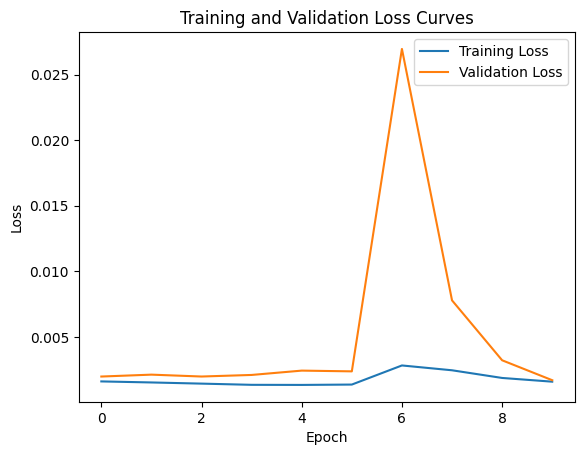

53/53 [==============================] - 2s 34ms/step
(1694, 42)
(1694, 256, 256, 1)


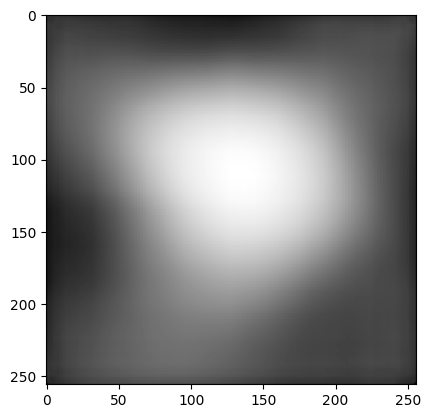

In [ ]:


    history = autoencoder.fit(train_dcmMask, train_dcmMask,
                              epochs=10, batch_size=32, validation_data=(val_dcmMask, val_dcmMask))


    # Plot the loss curves for training and validation
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()
   # test_loss, test_acc = autoencoder.evaluate(y_train, y_test)
    #print(f"Test accuracy: {test_acc:.3f}")
        ## Generated images
    train_encoded = encoder.predict(dcmMask, verbose=1)
    train_decoded = autoencoder.predict(dcmMask, verbose=1)

    # Check dimesnsions
    print(train_encoded.shape)
    print(train_decoded.shape)



    # Display original image after reshaping
    plt.imshow(dcmMask[0].reshape(256, 256), cmap='gray')



    #Show the generated image by AutoEncoder
    # train_decoded is the output of the decoder,i.e.,regenerated images
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

In [ ]:
 # Plot the loss curves for training and validation
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()

In [ ]:
!pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
from skopt import gp_minimize

In [ ]:
print('hello')

hello


In [ ]:
#result = gp_minimize(objective, parameters, n_calls=10, random_state=0)

In [ ]:
#print("Best hyperparameters:", result.x)
#print("Best loss:", result.fun)
#print('sssss',result)

In [ ]:
encoder = Model(inputs=input_img, outputs=encoded)
encoder.save('AW_0015_0015.h5')

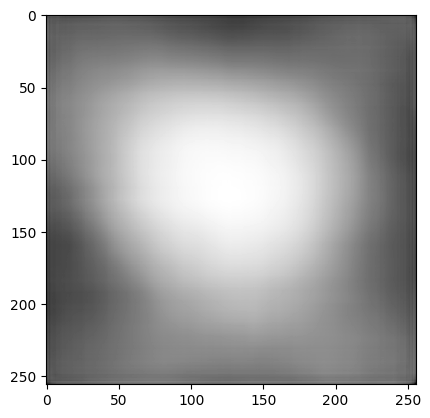

In [ ]:
plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

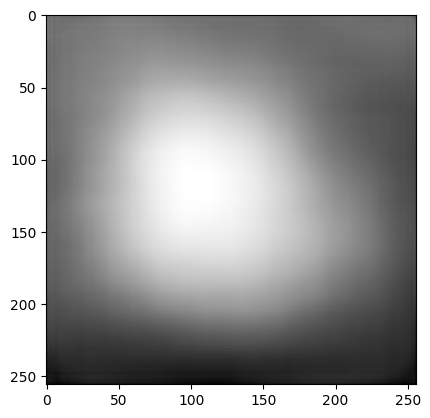

In [ ]:
plt.imshow(train_decoded[1].reshape(256, 256), cmap='gray')

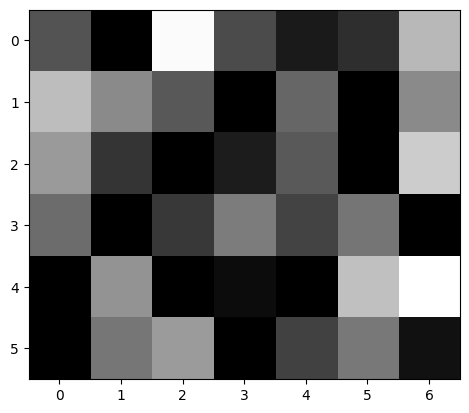

In [ ]:
plt.imshow(train_encoded[0].reshape(6, 7), cmap='gray')

In [ ]:
plt.imshow(train_decoded[2].reshape(256, 256), cmap='gray')

In [ ]:
plt.imshow(dcmMask[1].reshape(256, 256), cmap='gray')

In [ ]:
plt.imshow(dcmMask[2].reshape(256, 256), cmap='gray')

In [ ]:
plt.imshow(dcmMask[2].reshape(256, 256,1), cmap='hot')

In [ ]:
plt.imshow(train_decoded[2].reshape(256, 256,1), cmap='hot')

In [ ]:
print(dcmMask[0].reshape(256,256))

In [ ]:
print(train_decoded[0].reshape(256,256))

In [ ]:
train_decoded.shape

(493, 256, 256, 1)

In [ ]:
print(dcmMask[0].reshape(256,256))

In [ ]:
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='hot')

In [ ]:
plt.imshow(dcmMask[0].reshape(256, 256,1), cmap='hot')

In [ ]:
print(train_decoded[0].reshape(256, 256))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
files.download('encoder.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install tensorflow
!pip install tqdm
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DCM_File_Paths_Reduced.csv to DCM_File_Paths_Reduced.csv


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dcmMask , y_label, test_size=0.33, random_state=1)

NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model
encoder = load_model('encoder.h5')

KeyboardInterrupt: ignored

In [ ]:
X_train_encode = encoder.predict(X_train)

11/11 [==============================] - 28s 2s/step


In [ ]:
X_test_encode = encoder.predict(X_test)

6/6 [==============================] - 12s 2s/step


In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model



0.5276073619631901


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(X_train_encode.shape)

(330, 42)


In [ ]:
print(X_test_encode.shape)

(163, 42)


In [ ]:
X_test_encode[1]

array([0.        , 0.        , 0.        , 0.        , 0.1617742 ,
       1.628933  , 0.        , 0.        , 1.8055015 , 0.27268273,
       0.882162  , 0.        , 1.8249265 , 2.586392  , 0.        ,
       0.        , 0.        , 0.        , 0.8424745 , 0.        ,
       0.6719979 , 1.3833234 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.861406  , 0.        , 0.02542199, 0.        , 4.9831333 ,
       2.0250258 , 0.        , 1.5305842 , 0.        , 0.        ,
       0.81907934, 0.9763936 ], dtype=float32)

In [ ]:
X_train_encode[1]

array([0.59550774, 0.        , 0.        , 0.        , 0.6844981 ,
       1.9809278 , 0.        , 0.        , 1.9694933 , 0.61484694,
       1.3201197 , 0.10253969, 2.0795488 , 3.1533518 , 0.        ,
       0.        , 0.2026924 , 0.21999198, 1.2621822 , 0.31977206,
       0.9314694 , 1.529279  , 0.        , 0.        , 0.5161883 ,
       0.        , 0.13518782, 0.        , 0.        , 0.        ,
       1.5885918 , 0.        , 0.67469686, 0.        , 5.467178  ,
       2.4967437 , 0.        , 1.7416387 , 0.        , 0.        ,
       1.0814933 , 0.6312217 ], dtype=float32)

In [ ]:
dcmMask.shape

(493, 256, 256, 1)

In [ ]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



rf_classifier = RandomForestClassifier(n_estimators=1000,n_jobs=10, max_depth=10)
rf_classifier.fit(X_train_encode, y_train)

# Evaluate Random Forest
y_pred = rf_classifier.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5521472392638037


In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



a_classifier = AdaBoostClassifier(n_estimators=1000, learning_rate=1.1)
a_classifier.fit(X_train_encode, y_train)

# Evaluate Random Forest
y_pred = a_classifier.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5766871165644172


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



G_classifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=.01)
G_classifier.fit(X_train_encode, y_train)

# Evaluate Random Forest
y_pred = G_classifier.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5644171779141104
